# Brain MRI Detection using different Machine Learning Models

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Team Members
- Mohammad Ali Zahir - ID: 40077619
- Marwa Khalid - ID: 40155098

## Required Librairies
**Run the cell below to install all the required libraries.**

In [11]:
# !pip install matplotlib
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install scikit-learn
# !pip install scikit-image
# !pip install tensorflow
# !pip install tabulate

In [32]:
import matplotlib.pyplot as plt 
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from sklearn.svm import SVC





# Displaying Data

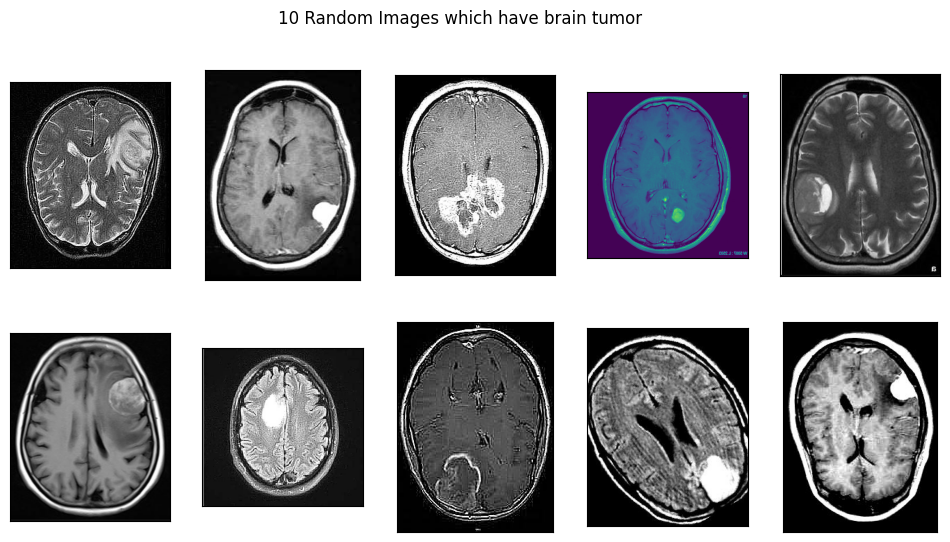

In [13]:
import os
import random
import matplotlib.pyplot as plt

folder_path = "drive/MyDrive/data/yes"
image_list = os.listdir(folder_path)
random_images = random.sample(image_list, 10)

image_data = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image_path = os.path.join(folder_path, random_images[i])
    img = plt.imread(image_path)
    image_data.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Images which have brain tumor")
plt.show()




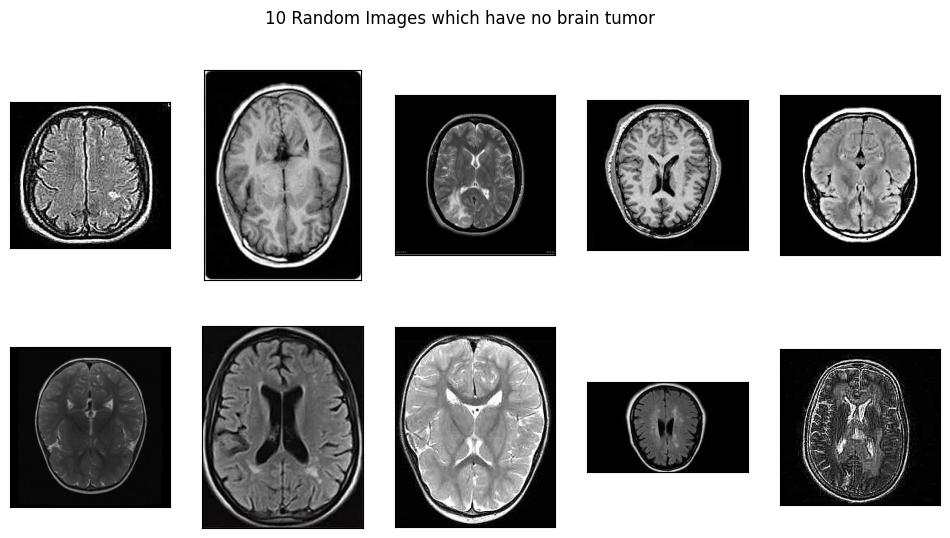

In [14]:
import os
import random
import matplotlib.pyplot as plt

folder_path = "drive/MyDrive/data/no"
image_list = os.listdir(folder_path)
random_images = random.sample(image_list, 10)

image_data = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image_path = os.path.join(folder_path, random_images[i])
    img = plt.imread(image_path)
    image_data.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Images which have no brain tumor")
plt.show()




# Normalizing and training the data

In [15]:
data_folder = "drive/MyDrive/data"
image_extensions = [".jpg", ".jpeg"]  # List of image extensions

# Get list of files in the folders
yes_folder = os.path.join(data_folder, "yes")
yes_files = [os.path.join(yes_folder, f) for f in os.listdir(yes_folder) if os.path.splitext(f)[1].lower() in image_extensions]

no_folder = os.path.join(data_folder, "no")
no_files = [os.path.join(no_folder, f) for f in os.listdir(no_folder) if os.path.splitext(f)[1].lower() in image_extensions]

# Combine the lists of files and create target labels
image_files = yes_files + no_files
target = np.concatenate([np.ones(len(yes_files)), np.zeros(len(no_files))])

# Shuffle and split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(image_files, target, test_size=0.2, random_state=42)


def load_images(image_list):
    images = []
    for image_path in image_list:
        img = plt.imread(image_path)
        img_resized = resize(img, (150, 150, 3))  # Resize to (150, 150, 3) shape
        img_norm = img_resized / 255.0  # Normalize to [0, 1] range
        images.append(img_norm)
    return np.array(images)



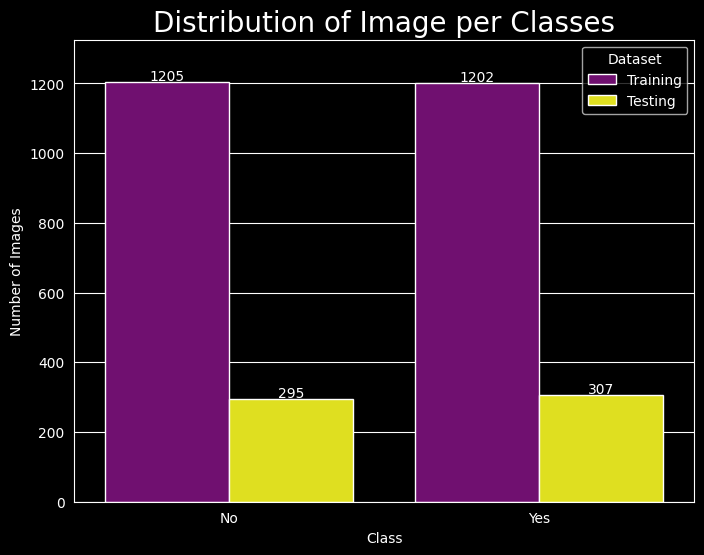

In [16]:
# Count the number of images for each class in the training and testing datasets
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True)

# Combine the count values into a single data frame
counts_df = pd.DataFrame({
    "Class": ["No", "Yes"],
    "Training": train_counts[1],
    "Testing": test_counts[1]
})

# Melt the data frame into a long format
counts_melt = counts_df.melt(id_vars=["Class"], var_name="Dataset", value_name="Count")
colors = ["purple", "yellow"]
sns.set_style(style="darkgrid")
plt.style.use("dark_background")
fig = plt.figure(facecolor='black', figsize=(8, 6))

# Create a bar plot with the count values displayed above each bar
ax = sns.barplot(x="Class", y="Count", hue="Dataset", data=counts_melt, palette=colors)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.ylim([0, max(counts_melt["Count"]) * 1.1])
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 5
    ax.text(x, y, str(int(height)), ha="center")

plt.title("Distribution of Image per Classes" , fontdict={'size':20})
plt.show()

# Neural Network Models

## Model 1: ConvNet CNN Model

In [33]:

# Load and normalize the images
X_train_norm = np.array(load_images(X_train))
X_test_norm = np.array(load_images(X_test))

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model for 20 epochs
history = model.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))


Epoch 1/20
76/76 [==============================] - 3s 13ms/step - loss: 0.6725 - accuracy: 0.5758 - val_loss: 0.5576 - val_accuracy: 0.7159
Epoch 2/20
76/76 [==============================] - 1s 9ms/step - loss: 0.5439 - accuracy: 0.7233 - val_loss: 0.5608 - val_accuracy: 0.7375
Epoch 3/20
76/76 [==============================] - 1s 9ms/step - loss: 0.5083 - accuracy: 0.7491 - val_loss: 0.5115 - val_accuracy: 0.7475
Epoch 4/20
76/76 [==============================] - 1s 9ms/step - loss: 0.4866 - accuracy: 0.7628 - val_loss: 0.4908 - val_accuracy: 0.7575
Epoch 5/20
76/76 [==============================] - 1s 9ms/step - loss: 0.4623 - accuracy: 0.7852 - val_loss: 0.4602 - val_accuracy: 0.7990
Epoch 6/20
76/76 [==============================] - 1s 9ms/step - loss: 0.4372 - accuracy: 0.8035 - val_loss: 0.4317 - val_accuracy: 0.8123
Epoch 7/20
76/76 [==============================] - 1s 9ms/step - loss: 0.3982 - accuracy: 0.8238 - val_loss: 0.4068 - val_accuracy: 0.8189
Epoch 8/20
76/76 [=

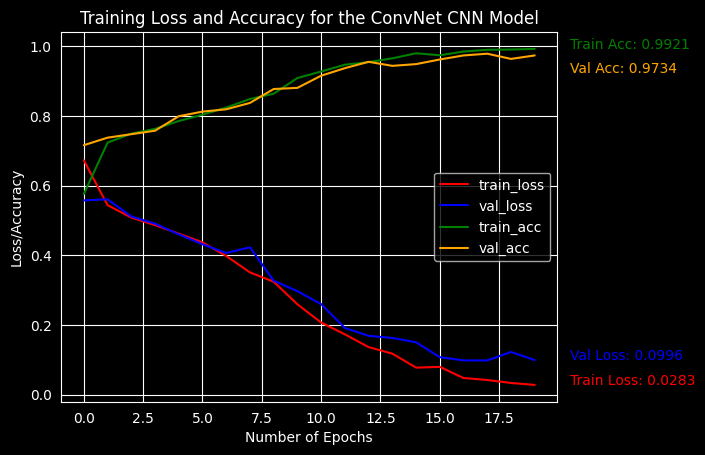

In [34]:
# plot the training loss and accuracy with dark background and dark plot
plt.style.use("dark_background")
fig = plt.figure(facecolor='black')
plt.plot(history.history["loss"], color='red', label="train_loss")
plt.plot(history.history["val_loss"], color='blue', label="val_loss")
plt.plot(history.history["accuracy"], color='green', label="train_acc")
plt.plot(history.history["val_accuracy"], color='orange', label="val_acc")
plt.title("Training Loss and Accuracy for the ConvNet CNN Model", color='white')
plt.xlabel("Number of Epochs", color='white')
plt.ylabel("Loss/Accuracy", color='white')
plt.legend(loc="center right")

# Get final training and validation loss/accuracy values
train_loss_final = round(history.history["loss"][-1], 4)
val_loss_final = round(history.history["val_loss"][-1], 4)
train_acc_final = round(history.history["accuracy"][-1], 4)
val_acc_final = round(history.history["val_accuracy"][-1], 4)

# Add final values to the plot
plt.text(len(history.history["loss"])+0.5, train_loss_final, f'Train Loss: {train_loss_final}', fontsize=10, color='red')
plt.text(len(history.history["val_loss"]) +0.5, val_loss_final, f'Val Loss: {val_loss_final}', fontsize=10, color='blue')
plt.text(len(history.history["accuracy"]) +0.5, train_acc_final, f'Train Acc: {train_acc_final}', fontsize=10, color='green')
plt.text(len(history.history["val_accuracy"])+0.5, val_acc_final-0.05, f'Val Acc: {val_acc_final}', fontsize=10, color='orange')

plt.show()



## Model 2: Multilayer Perceptron

In [35]:
# Load and normalize the images
X_train_norm = np.array(load_images(X_train))
X_test_norm = np.array(load_images(X_test))

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model for 20 epochs
history = model.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))


Epoch 1/20
76/76 [==============================] - 2s 11ms/step - loss: 0.5528 - accuracy: 0.7092 - val_loss: 0.4875 - val_accuracy: 0.7458
Epoch 2/20
76/76 [==============================] - 0s 6ms/step - loss: 0.4176 - accuracy: 0.8106 - val_loss: 0.4268 - val_accuracy: 0.8455
Epoch 3/20
76/76 [==============================] - 0s 6ms/step - loss: 0.3446 - accuracy: 0.8517 - val_loss: 0.3933 - val_accuracy: 0.7973
Epoch 4/20
76/76 [==============================] - 0s 6ms/step - loss: 0.2812 - accuracy: 0.8941 - val_loss: 0.3088 - val_accuracy: 0.8904
Epoch 5/20
76/76 [==============================] - 0s 6ms/step - loss: 0.2509 - accuracy: 0.9003 - val_loss: 0.2763 - val_accuracy: 0.8987
Epoch 6/20
76/76 [==============================] - 0s 6ms/step - loss: 0.1817 - accuracy: 0.9439 - val_loss: 0.3105 - val_accuracy: 0.8571
Epoch 7/20
76/76 [==============================] - 0s 6ms/step - loss: 0.1636 - accuracy: 0.9435 - val_loss: 0.2223 - val_accuracy: 0.9236
Epoch 8/20
76/76 [=

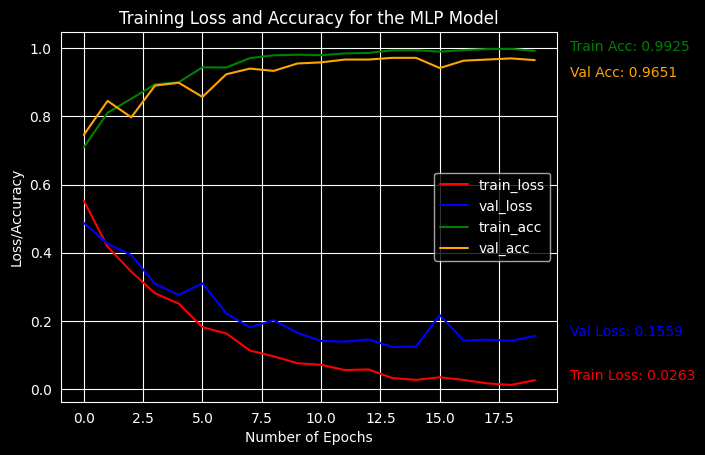

In [36]:
# plot the training loss and accuracy with dark background and dark plot
plt.style.use("dark_background")
fig = plt.figure(facecolor='black')
plt.plot(history.history["loss"], color='red', label="train_loss")
plt.plot(history.history["val_loss"], color='blue', label="val_loss")
plt.plot(history.history["accuracy"], color='green', label="train_acc")
plt.plot(history.history["val_accuracy"], color='orange', label="val_acc")
plt.title("Training Loss and Accuracy for the MLP Model", color='white')
plt.xlabel("Number of Epochs", color='white')
plt.ylabel("Loss/Accuracy", color='white')
plt.legend(loc="center right")

# Get final training and validation loss/accuracy values
train_loss_final = round(history.history["loss"][-1], 4)
val_loss_final = round(history.history["val_loss"][-1], 4)
train_acc_final = round(history.history["accuracy"][-1], 4)
val_acc_final = round(history.history["val_accuracy"][-1], 4)

# Add final values to the plot
plt.text(len(history.history["loss"])+0.5, train_loss_final, f'Train Loss: {train_loss_final}', fontsize=10, color='red')
plt.text(len(history.history["val_loss"]) +0.5, val_loss_final, f'Val Loss: {val_loss_final}', fontsize=10, color='blue')
plt.text(len(history.history["accuracy"]) +0.5, train_acc_final, f'Train Acc: {train_acc_final}', fontsize=10, color='green')
plt.text(len(history.history["val_accuracy"])+0.5, val_acc_final-0.05, f'Val Acc: {val_acc_final}', fontsize=10, color='orange')

plt.show()


# Machine Learning Models

## Model 3: K-Nearest Neighbors

In [21]:
# Create the knn model with the best parameters
# Load and normalize the images

X_train_norm = np.array(load_images(X_train))
X_test_norm = np.array(load_images(X_test))

# Flatten the images
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

# Perform k-nearest neighbor classification
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_flat, y_train)
y_pred = knn.predict(X_test_flat)

# Print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
# Convert the dictionary to a pandas dataframe
df_nb = pd.DataFrame(report).transpose()

# Format the values as percentages
df_nb.loc[:, 'precision':'f1-score'] = df_nb.loc[:, 'precision':'f1-score'].applymap(lambda x: f'{x:.2%}')

# Print the dataframe
report_table = tabulate(df_nb.drop('accuracy'), headers='keys',tablefmt="grid",
            stralign="right", numalign="right")
print(report_table)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nk-Nearest Neighbor accuracy: {accuracy:.2f}%")

+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
|          0.0 |      95.42% |   98.98% |     97.17% |       295 |
+--------------+-------------+----------+------------+-----------+
|          1.0 |      98.99% |   95.44% |     97.18% |       307 |
+--------------+-------------+----------+------------+-----------+
|    macro avg |      97.21% |   97.21% |     97.18% |       602 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |      97.24% |   97.18% |     97.18% |       602 |
+--------------+-------------+----------+------------+-----------+

k-Nearest Neighbor accuracy: 97.18%


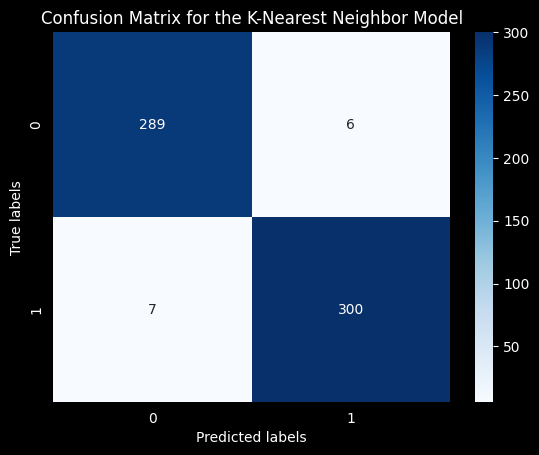

In [37]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set the labels and title of the plot
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for the K-Nearest Neighbor Model")

plt.show()


## Model 4: Support Vector Machine

In [38]:
# Create the SVM model with the best parameters
# Load and normalize the images
X_train_norm = np.array(load_images(X_train))
X_test_norm = np.array(load_images(X_test))

# Flatten the images
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

# Define the SVM model
svm_model = SVC(C=10, kernel='rbf', degree=2)

svm_model.fit(X_train_flat, y_train)

# Predict the test data using the optimized model
y_pred = svm_model.predict(X_test_flat)

# Print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
# Convert the dictionary to a pandas dataframe
df_svm = pd.DataFrame(report).transpose()

# Format the values as percentages
df_svm.loc[:, 'precision':'f1-score'] = df_svm.loc[:, 'precision':'f1-score'].applymap(lambda x: f'{x:.2%}')

# Print the dataframe
report_table = tabulate(df_svm.drop('accuracy'), headers='keys',tablefmt="grid",
            stralign="right", numalign="right")
print(report_table)

# Print the SVM accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nSVM accuracy: {accuracy:.2f}%")


+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
|          0.0 |      97.64% |   97.97% |     97.80% |       295 |
+--------------+-------------+----------+------------+-----------+
|          1.0 |      98.04% |   97.72% |     97.88% |       307 |
+--------------+-------------+----------+------------+-----------+
|    macro avg |      97.84% |   97.84% |     97.84% |       602 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |      97.84% |   97.84% |     97.84% |       602 |
+--------------+-------------+----------+------------+-----------+

SVM accuracy: 97.84%


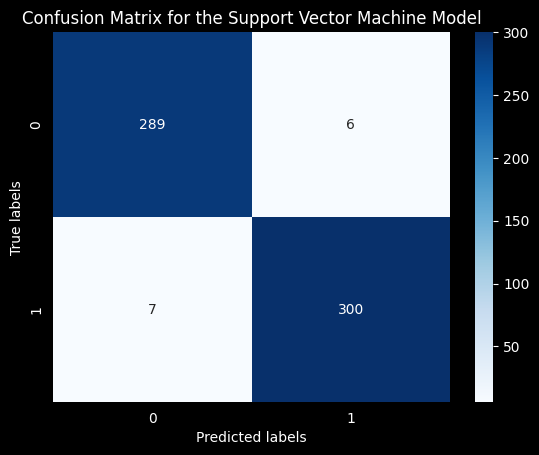

In [39]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set the labels and title of the plot
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for the Support Vector Machine Model")

plt.show()
